# Torch_ Create Tensors

### Create tensor from scratch
            empty
            zeros
            ones
            rand

In [2]:
import torch
import numpy as np
import pandas as pd

#### A tensor filled with uninitialized value : torch.empty()

In [7]:
x = torch.empty(5,3)
x

tensor([[-2.1626e+17,  7.4969e-43,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00]])

#### A tensor filled with zeross : torch.zeros()

In [8]:
x=torch.zeros(5,3)
x

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

#### A tensor filled with ones : torch.ones()

In [9]:
x=torch.ones(5,3)
x

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

#### A tensor filled with random data from a normal distributions : torch.rand()

In [10]:
x=torch.rand(5,3)
x

tensor([[0.3843, 0.4909, 0.6162],
        [0.9721, 0.3627, 0.3297],
        [0.5790, 0.8902, 0.7275],
        [0.9179, 0.3535, 0.6418],
        [0.6054, 0.3067, 0.8554]])

### Create from other datatypes

#### Create tensor from Dataframe

In [12]:
import pandas as pd
import torch

# Create a sample DataFrame
data = {'A': [1, 2, 3], 'B': [4, 5, 6]}
df = pd.DataFrame(data)

# Convert DataFrame to a PyTorch tensor
tensor = torch.tensor(df.values)
tensor


tensor([[1, 4],
        [2, 5],
        [3, 6]])

#### From CSV
    Conversion Steps:
        Use pandas.read_csv() to load the data.
        Convert the DataFrame/array to a tensor.

In [15]:
# Using pandas
import pandas as pd
import torch

df = pd.read_csv('../Datasets/oil_dataset.csv')  # Load CSV as DataFrame
tensor_df = torch.tensor(df.values)
tensor_df



tensor([[ 1.0000e+00,  2.5580e+03,  1.5061e+03,  ...,  6.5740e+01,
          7.9500e+00,  1.0000e+00],
        [ 2.0000e+00,  2.2325e+04,  7.9110e+01,  ...,  6.5730e+01,
          6.2600e+00, -1.0000e+00],
        [ 3.0000e+00,  1.1500e+02,  1.4498e+03,  ...,  6.5810e+01,
          7.8400e+00,  1.0000e+00],
        ...,
        [ 2.0200e+02,  1.4000e+01,  2.5140e+01,  ...,  6.5910e+01,
          6.1200e+00, -1.0000e+00],
        [ 2.0300e+02,  1.0000e+01,  9.6000e+01,  ...,  6.5970e+01,
          6.3200e+00, -1.0000e+00],
        [ 2.0400e+02,  1.1000e+01,  7.7300e+00,  ...,  6.5650e+01,
          6.2600e+00, -1.0000e+00]], dtype=torch.float64)

#### From JSON
    Conversion Steps:
        Load the JSON file with json or pandas.read_json().
        Convert the data into a flat numeric structure.
        Create a tensor.

In [17]:
import json
import torch

# Example JSON data
json_data = '{"A": [1, 2, 3], "B": [4, 5, 6]}'

# Load JSON
data = json.loads(json_data)
# Convert to tensor
tensor = torch.tensor([data["A"], data["B"]])
tensor


tensor([[1, 2, 3],
        [4, 5, 6]])

# Tensor datatypes

Commonly Used Datatypes:
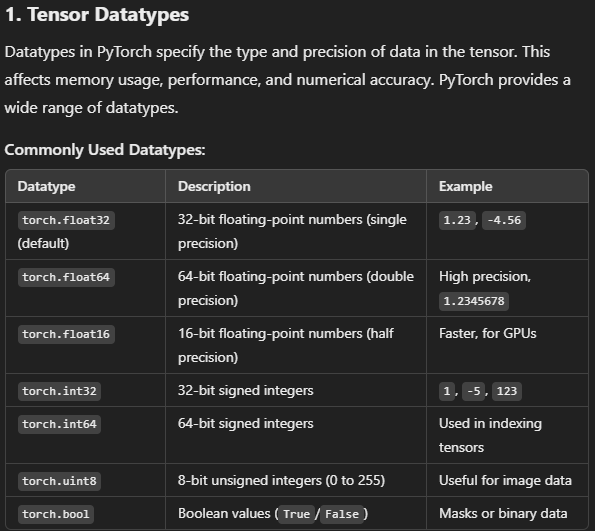
You can specify the datatype of a tensor during its creation or convert an existing tensor to a different datatype.

In [18]:
import torch

# Create a tensor with a specific datatype
float_tensor = torch.tensor([1.5, 2.5], dtype=torch.float32)
int_tensor = torch.tensor([1, 2, 3], dtype=torch.int32)

# Check and change datatype
print(float_tensor.dtype)  # Output: torch.float32
converted_tensor = float_tensor.to(torch.int32)
print(converted_tensor.dtype)  # Output: torch.int32


torch.float32
torch.int32


# Neural Network in Torch

## Aproach 1
- Prediction: Manually
- Gradients Computation: Manually
- Loss Computation: Manually
- Parameter updates: Manually

In [3]:
import numpy as np
# initialize x, y and w
x=np.array([1,2,3,4],dtype=np.float32)
y=np.array([2,4,6,8],dtype=np.float32)
w=0.0
# model prediction via forward pass
def forward(x):
    return w*x
# loss calculation
def loss(y,y_predicted):
    return ((y_predicted-y)**2).mean()
# gradient calculation
def gradient(x,y,y_predicted):
    return np.dot(2*x,y_predicted-y).mean()
print(f'Prediction before training: f(5)={forward(5):.3f}')
# training
learning_rate=0.01
n_iters=10
for epoch in range(n_iters):
    y_pred=forward(x)
    l=loss(y,y_pred)
    dw=gradient(x,y,y_pred)
    w-=learning_rate*dw
    if epoch%1==0:
        print(f'epoch {epoch+1}: w={w:.3f}, loss={l:.8f}')

print(f'Prediction after training: f(5)={forward(5):.3f}')


Prediction before training: f(5)=0.000
epoch 1: w=1.200, loss=30.00000000
epoch 2: w=1.680, loss=4.79999924
epoch 3: w=1.872, loss=0.76800019
epoch 4: w=1.949, loss=0.12288000
epoch 5: w=1.980, loss=0.01966083
epoch 6: w=1.992, loss=0.00314574
epoch 7: w=1.997, loss=0.00050331
epoch 8: w=1.999, loss=0.00008053
epoch 9: w=1.999, loss=0.00001288
epoch 10: w=2.000, loss=0.00000206
Prediction after training: f(5)=9.999


## Approach 2
- Prediction: Manually*
- Gradients Computation: Autograd
- Loss Computation: Manually
- Parameter updates: Manually

In [8]:
import torch
# initialize x, y and w
x=torch.tensor([1,2,3,4],dtype=torch.float32)
y=torch.tensor([2,4,6,8],dtype=torch.float32)
w=torch.tensor(0.0,dtype=torch.float32,requires_grad=True)
# model prediction via forward pass
def forward(x):
    return w*x
# loss calculation
def loss(y,y_predicted):
    return ((y_predicted-y)**2).mean()
# gradient calculation
# gradient will be calculated automatically 
# using autograd when we call loss.backward()
# w has requires_grad=True --> autograd will track all operations on w
# --> calling loss.backward() will calculate the gradient of loss w.r.t w
# --> will be stored in w.grad
print(f'Prediction before training: f(5)={forward(5):.3f}')
# training
learning_rate=0.01
n_iters=100
# this process is slow for autograd because it is dynamic, meaning it keeps track of all operations on tensors
# so it is slower than numpy
# so more epochs are needed
for epoch in range(n_iters):
    y_pred=forward(x)
    l=loss(y,y_pred)
    l.backward()# calculate gradient of loss w.r.t w
    # grad is stored in w.grad
    with torch.no_grad():
        w -= learning_rate * w.grad 
        w.grad.zero_()
    if epoch%10==0:
        print(f'epoch {epoch+1}: w={w:.3f}, loss={l:.8f}')

print(f'Prediction after training: f(5)={forward(5):.3f}')


Prediction before training: f(5)=0.000
epoch 1: w=0.300, loss=30.00000000
epoch 11: w=1.665, loss=1.16278565
epoch 21: w=1.934, loss=0.04506890
epoch 31: w=1.987, loss=0.00174685
epoch 41: w=1.997, loss=0.00006770
epoch 51: w=1.999, loss=0.00000262
epoch 61: w=2.000, loss=0.00000010
epoch 71: w=2.000, loss=0.00000000
epoch 81: w=2.000, loss=0.00000000
epoch 91: w=2.000, loss=0.00000000
Prediction after training: f(5)=10.000


## Appraoch 3
- Prediction: Manually
- Gradients Computation: Autograd
- Loss Computation: PyTorch Loss
- Parameter updates: PyTorch Optimizer

In [12]:
import torch
# initialize x, y and w
x=torch.tensor([1,2,3,4],dtype=torch.float32)
y=torch.tensor([2,4,6,8],dtype=torch.float32)
w=torch.tensor(0.0,dtype=torch.float32,requires_grad=True)
# model prediction via forward pass
def forward(x):
    return w*x
# loss calculation
loss=torch.nn.MSELoss()
#parameter upfates/optmization
optimizer=torch.optim.SGD([w],lr=0.01)
print(f'Prediction before training: f(5)={forward(5):.3f}')
# training
n_iters=100
for epoch in range(n_iters):
    y_pred=forward(x)
    l=loss(y,y_pred)
    l.backward()# calculate gradient of loss w.r.t w
                # grad is stored in w.grad
    # update weights                        #Previously:
    optimizer.step()                        # with torch.no_grad():
    # empty gradients                       #     w -= learning_rate * w.grad 
    optimizer.zero_grad()                     #     w.grad.zero_()                                  
    if epoch%10==0:
        print(f'epoch {epoch+1}: w={w:.3f}, loss={l:.8f}')

print(f'Prediction after training: f(5)={forward(5):.3f}')

Prediction before training: f(5)=0.000
epoch 1: w=0.300, loss=30.00000000
epoch 11: w=1.665, loss=1.16278565
epoch 21: w=1.934, loss=0.04506890
epoch 31: w=1.987, loss=0.00174685
epoch 41: w=1.997, loss=0.00006770
epoch 51: w=1.999, loss=0.00000262
epoch 61: w=2.000, loss=0.00000010
epoch 71: w=2.000, loss=0.00000000
epoch 81: w=2.000, loss=0.00000000
epoch 91: w=2.000, loss=0.00000000
Prediction after training: f(5)=10.000


## Approach 4
- Prediction: PyTorch Model
- Gradients Computation: Autograd
- Loss Computation: PyTorch Loss
- Parameter updates: PyTorch Optimizer

In [ ]:
import torch
import torch.nn as nn
# initialize x, y and w
x=torch.tensor([[1],[2],[3],[4]],dtype=torch.float32)
y=torch.tensor([[2],[4],[6],[8]],dtype=torch.float32)
# model must have no. of feature and instances defined
n_samples,n_features=x.shape
input_size=n_features
output_size=n_features
# model prediction via forward pass
model = nn.Linear(input_size,output_size)
# loss calculation
loss=torch.nn.MSELoss()
#parameter upfates/optmization
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)


#x test is defined as tensor so that it can work with model
x_test=torch.tensor([5],dtype=torch.float32)
# for better visualization, express predict as a scalar
print(f'Prediction before training: f(5)={model(x_test).item():.3f}')
# training
n_iters=100
for epoch in range(n_iters):
    y_pred=model(x) # use model to predict
    l=loss(y,y_pred)
    l.backward()# calculate gradient of loss w.r.t w
                # grad is stored in w.grad
    # update weights                        #Previously:
    optimizer.step()                        # with torch.no_grad():
    # empty gradients                       #     w -= learning_rate * w.grad 
    optimizer.zero_grad()                     #     w.grad.zero_()                                  
    if epoch%10==0:
        print(f'epoch {epoch+1}: w={w:.3f}, loss={l:.8f}')

print(f'Prediction after training: f(5)={model(x_test).item():.3f}')

# didn't need to create the model for ourself
# optimization is faster


Prediction before training: f(5)=-1.875
epoch 1: w=2.000, loss=38.68419266
epoch 11: w=2.000, loss=1.34160626
epoch 21: w=2.000, loss=0.35563082
epoch 31: w=2.000, loss=0.31144208
epoch 41: w=2.000, loss=0.29270688
epoch 51: w=2.000, loss=0.27565396
epoch 61: w=2.000, loss=0.25960913
epoch 71: w=2.000, loss=0.24449866
epoch 81: w=2.000, loss=0.23026747
epoch 91: w=2.000, loss=0.21686473
Prediction after training: f(5)=9.225


## Present case 4 as a model

In [ ]:
class LinearRegression(nn.module):
    def __init__(self,input_dim,output_dim):
        super(LinearRegression,self).__init__()
        self.lin=nn.Linear(input_dim,output_dim)
    def forward(self,x):
        return self.lin(x)
model=LinearRegression(input_size,output_size)